# VGG type convolutional neural network (CNN) classifier

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam

* Importing and shaping the data *

4423680/4422102 [==============================] - 0s 0us/step
input_train (original):  (60000, 28, 28)
input_test (original):  (10000, 28, 28)

input_train :  (60000, 28, 28, 1)
output_train_class :  (60000,)
output_train_class_onehot :  (60000, 10)

input_test :  (10000, 28, 28, 1)
output_test_class :  (10000,)
output_test_class_onehot :  (10000, 10)

output_class_names :  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

item_id :  5
output_train_class [item_id] :  2
output_train_class_onehot [item_id] :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


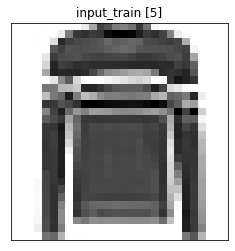

In [ ]:
print('* Importing and shaping the data *')
print()

mnist = tf.keras.datasets.fashion_mnist  # load mnist dataset from tensorflow
(input_train, output_train_class), (input_test, output_test_class) = mnist.load_data()

print('input_train (original): ', input_train.shape)
print('input_test (original): ', input_test.shape)
print()

input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

input_train = input_train / 255.0  # max normalise the image data[0:1]
input_test = input_test / 255.0

output_train_class_onehot = tf.keras.utils.to_categorical(output_train_class, 10)  # create one-hot encoded class
output_test_class_onehot = tf.keras.utils.to_categorical(output_test_class, 10)

output_class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']    # class names string

print('input_train : ', input_train.shape)
print('output_train_class : ', output_train_class.shape)
print('output_train_class_onehot : ', output_train_class_onehot.shape)
print()
print('input_test : ', input_test.shape)
print('output_test_class : ', output_test_class.shape)
print('output_test_class_onehot : ', output_test_class_onehot.shape)
print()
print('output_class_names : ', output_class_names)
print()

item_id = 5

print('item_id : ', item_id)
print('output_train_class [item_id] : ', output_train_class[item_id])
print('output_train_class_onehot [item_id] : ', output_train_class_onehot[item_id, :])

plt.imshow(input_train[item_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_train [' + str(item_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
optimizer_type = Adam(lr=0.2)#SGD(lr=0.2)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

In [ ]:
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

down_01 = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
down_01 = Activation('relu')(down_01)
down_01 = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same')(down_01)
down_01 = Activation('relu')(down_01)

down_01_pool = MaxPooling2D((2, 2), strides=(2, 2))(down_01)   # maxpool downsampled to 14x14x16

down_02 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same')(down_01_pool)
down_02 = Activation('relu')(down_02)
down_02 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same')(down_02)
down_02 = Activation('relu')(down_02)

down_02_pool = MaxPooling2D((2, 2), strides=(2, 2))(down_02)   # maxpool downsampled to 7x7x32

flatten = Flatten()(down_02_pool)   # 1568 nodes

dense_01 = Dense(num_hidden_nodes)(flatten)
dense_01 = Activation('sigmoid')(dense_01)
dense_01 = Dropout(dropout_ratio)(dense_01)

dense_02 = Dense(10)(dense_01)
outputs = Activation('softmax')(dense_02)


* Compiling the network model *

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)        

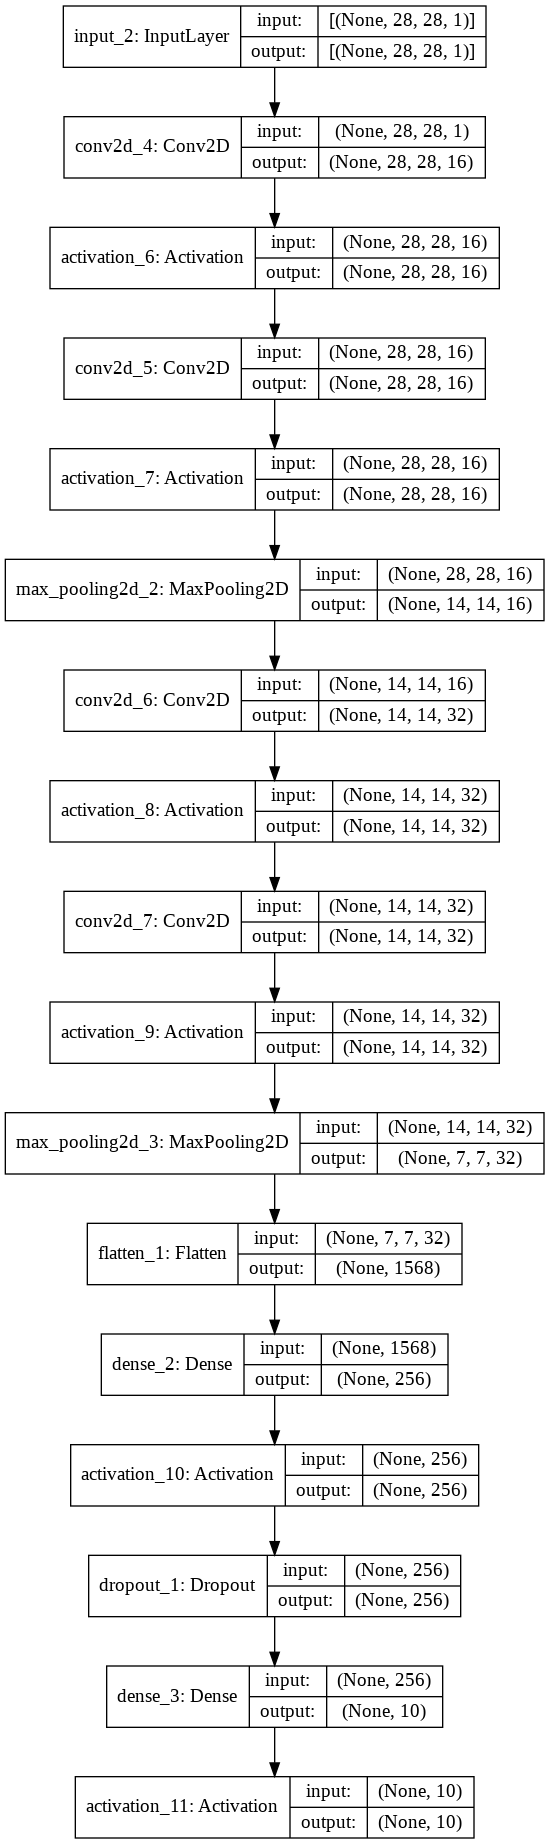

In [ ]:
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

In [ ]:
print('* Training the compiled network *')
print()

history = model.fit(input_train, output_train_class_onehot, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)

print()
print('Training completed')
print()

* Training the compiled network *

Epoch 1/40
96/96 [==============================] - 2s 17ms/step - loss: 1.7322 - categorical_accuracy: 0.3734 - val_loss: 0.7056 - val_categorical_accuracy: 0.7310
Epoch 2/40
96/96 [==============================] - 1s 15ms/step - loss: 0.7139 - categorical_accuracy: 0.7260 - val_loss: 0.6715 - val_categorical_accuracy: 0.7494
Epoch 3/40
96/96 [==============================] - 1s 15ms/step - loss: 0.5558 - categorical_accuracy: 0.7881 - val_loss: 0.4883 - val_categorical_accuracy: 0.8137
Epoch 4/40
96/96 [==============================] - 1s 15ms/step - loss: 0.4760 - categorical_accuracy: 0.8223 - val_loss: 0.4379 - val_categorical_accuracy: 0.8426
Epoch 5/40
96/96 [==============================] - 1s 15ms/step - loss: 0.4345 - categorical_accuracy: 0.8382 - val_loss: 0.4181 - val_categorical_accuracy: 0.8469
Epoch 6/40
96/96 [==============================] - 1s 15ms/step - loss: 0.4125 - categorical_accuracy: 0.8479 - val_loss: 0.4473 - val_cate

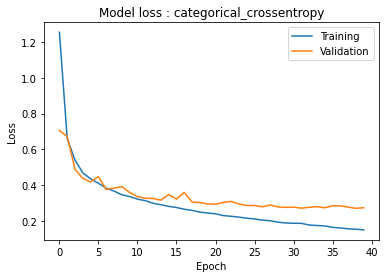

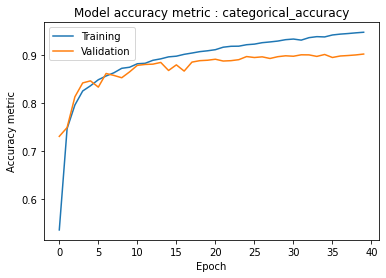

In [ ]:
# model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss : ' + loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

# model accuracy metric

plt.plot(np.array(history.history[metrics[0]]))
plt.plot(np.array(history.history['val_' + metrics[0]]))
plt.title('Model accuracy metric : ' + metrics[0])
plt.ylabel('Accuracy metric')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

In [ ]:
print('* Evaluating the performance of the trained network on the unseen test dataset *')
print()

evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
loss_metric = evaluate_model [0]
accuracy_metric = evaluate_model [1]

print()
print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
print('Loss - ' + loss + ': %0.3f'%loss_metric)

* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 3ms/step - loss: 0.2919 - categorical_accuracy: 0.8968

Accuracy - categorical_accuracy: 0.897
Loss - categorical_crossentropy: 0.292


In [ ]:
from sklearn.metrics import classification_report

output_predict_class_onehot = model.predict(input_test)
output_predict_class = np.argmax(output_predict_class_onehot, axis=1)

print('* Test set classification report *')
print()
print(classification_report(output_test_class, output_predict_class,  \
                            target_names=output_class_names))

* Test set classification report *

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       1.00      0.97      0.98      1000
           2       0.81      0.85      0.83      1000
           3       0.87      0.92      0.89      1000
           4       0.84      0.81      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.78      0.65      0.71      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



* Confusion probability matrix *



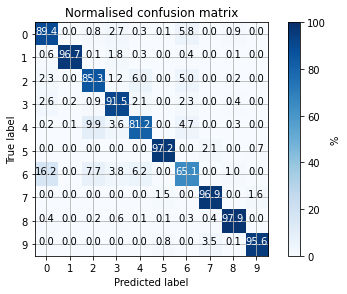

In [ ]:
print('* Confusion probability matrix *')
print()

import itertools

from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(output_test_class, output_predict_class)  # confusion matrix

confusion_probability_matrix = confusion_matrix.astype('float') / \
                               confusion_matrix.sum(axis=1)[:, np.newaxis]  # row normalisation of confusion matrix
confusion_probability_matrix = confusion_probability_matrix * 100.0  # confusion probability matrix

plt.imshow(confusion_probability_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalised confusion matrix')    
plt.colorbar(label='%')
plt.clim(0, 100)
tick_marks = np.arange(len(output_class_names))
plt.xticks(tick_marks, output_class_names, rotation=0)
plt.yticks(tick_marks, output_class_names)
fmt = '.1f'
thresh = confusion_probability_matrix.max() / 2.0
for i, j in itertools.product(range(confusion_probability_matrix.shape[0]), range(confusion_probability_matrix.shape[1])):
    plt.text(j, i, format(confusion_probability_matrix[i, j], fmt),
             horizontalalignment='center',
             color='white' if confusion_probability_matrix[i, j] > thresh else 'black')    
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(None)
plt.show()
plt.close()

* Predicting the class of a given input *

test_id :  98

output_predict_class_onehot [test_id]: 

 [[4.40739648e-04 1.11671456e-04 8.90495777e-01 3.94789316e-03
  8.38495418e-02 1.15166349e-05 1.11317905e-02 9.48164525e-05
  9.85667761e-03 5.94600351e-05]]

sum[output_predict_class_onehot [test_id]] :  0.99999994

output_test_class_onehot [item_id] :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

output_test_class [item_id] :  4

output_predict_class [item_id] :  2



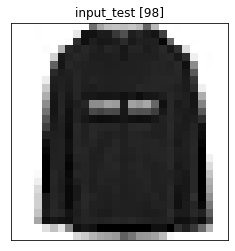

In [ ]:
print('* Predicting the class of a given input *')
print()

test_id = 98

input_predict = np.zeros(shape=(1, 28, 28, 1))  # create numpy array of required dimensions for network input

input_predict[0, :, :, 0] = input_test[test_id, :, :, 0]  # reshaping test input image

output_predict_class_onehot = model.predict(input_predict)  # softmax distribution of predicted class

output_predict_class = np.argmax(output_predict_class_onehot[0])  # predicted class of input

print('test_id : ', test_id)
print()
print('output_predict_class_onehot [test_id]: \n\n', output_predict_class_onehot)
print()
print('sum[output_predict_class_onehot [test_id]] : ', np.sum(output_predict_class_onehot))  # should be = 1.0
print()
print('output_test_class_onehot [item_id] : ', output_test_class_onehot[test_id])
print()
print('output_test_class [item_id] : ', output_test_class[test_id])
print()
print('output_predict_class [item_id] : ', output_predict_class)
print()

plt.imshow(input_test[test_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_test [' + str(test_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()


## 2: With Dropout

In [ ]:
optimizer_type = SGD(lr=0.2)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.5  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

In [ ]:
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

down_01 = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
down_01 = Activation('relu')(down_01)
down_01 = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same')(down_01)
down_01 = Activation('relu')(down_01)

down_01_pool = MaxPooling2D((2, 2), strides=(2, 2))(down_01)   # maxpool downsampled to 14x14x16

down_02 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same')(down_01_pool)
down_02 = Activation('relu')(down_02)
down_02 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same')(down_02)
down_02 = Activation('relu')(down_02)

down_02_pool = MaxPooling2D((2, 2), strides=(2, 2))(down_02)   # maxpool downsampled to 7x7x32

flatten = Flatten()(down_02_pool)   # 1568 nodes

dense_01 = Dense(num_hidden_nodes)(flatten)
dense_01 = Activation('sigmoid')(dense_01)
dense_01 = Dropout(dropout_ratio)(dense_01)

dense_02 = Dense(10)(dense_01)
outputs = Activation('softmax')(dense_02)


* Compiling the network model *

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_24 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
activation_25 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)       

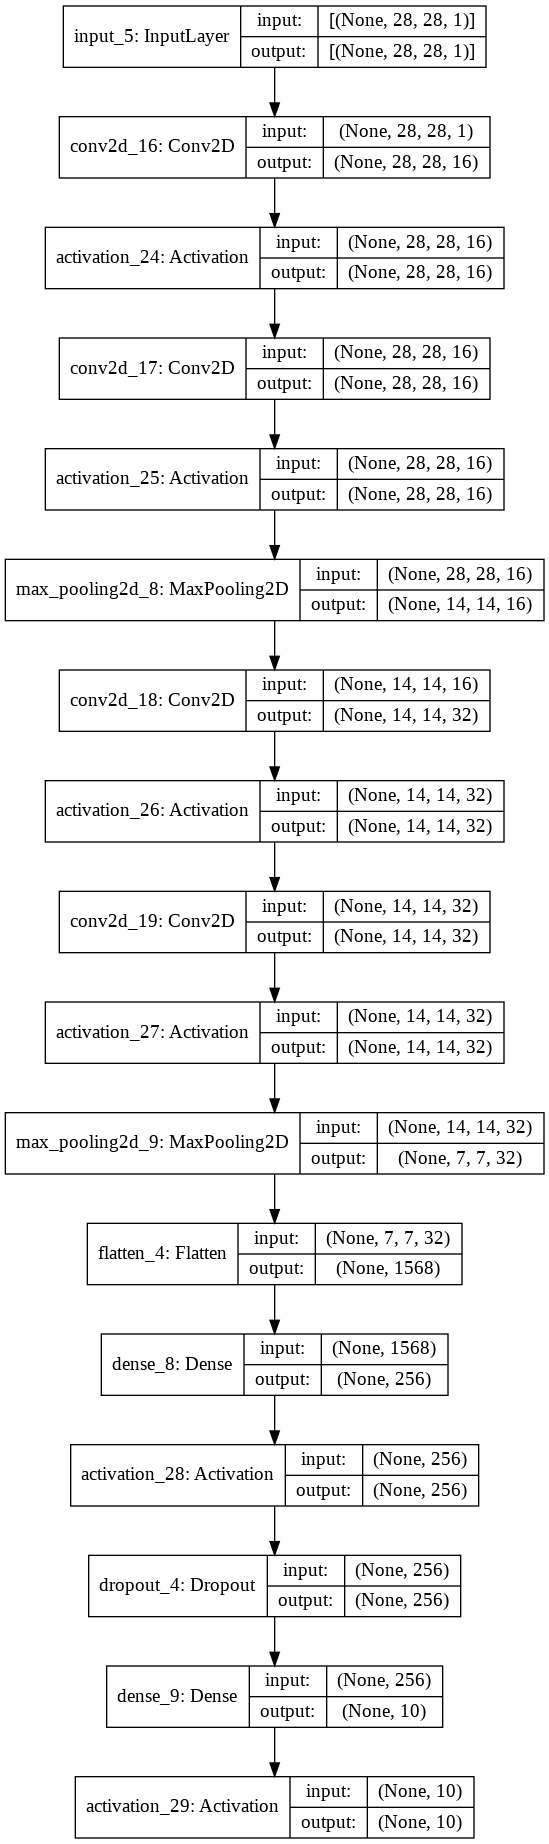

In [ ]:
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

In [ ]:
print('* Training the compiled network *')
print()

history = model.fit(input_train, output_train_class_onehot, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)

print()
print('Training completed')
print()

* Training the compiled network *

Epoch 1/40
96/96 [==============================] - 2s 18ms/step - loss: 1.9859 - categorical_accuracy: 0.2838 - val_loss: 0.8316 - val_categorical_accuracy: 0.6704
Epoch 2/40
96/96 [==============================] - 1s 15ms/step - loss: 0.7972 - categorical_accuracy: 0.6885 - val_loss: 0.6232 - val_categorical_accuracy: 0.7528
Epoch 3/40
96/96 [==============================] - 1s 15ms/step - loss: 0.6159 - categorical_accuracy: 0.7678 - val_loss: 0.5017 - val_categorical_accuracy: 0.8140
Epoch 4/40
96/96 [==============================] - 1s 15ms/step - loss: 0.5467 - categorical_accuracy: 0.7948 - val_loss: 0.4753 - val_categorical_accuracy: 0.8188
Epoch 5/40
96/96 [==============================] - 1s 15ms/step - loss: 0.4952 - categorical_accuracy: 0.8172 - val_loss: 0.4382 - val_categorical_accuracy: 0.8334
Epoch 6/40
96/96 [==============================] - 1s 15ms/step - loss: 0.4541 - categorical_accuracy: 0.8319 - val_loss: 0.4456 - val_cate

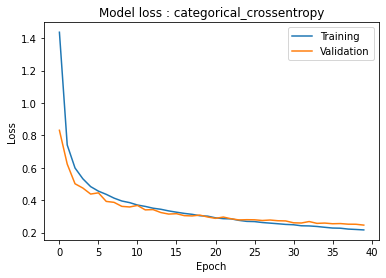

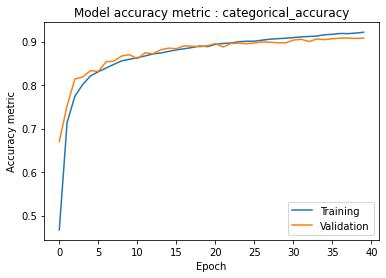

In [ ]:
# model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss : ' + loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

# model accuracy metric

plt.plot(np.array(history.history[metrics[0]]))
plt.plot(np.array(history.history['val_' + metrics[0]]))
plt.title('Model accuracy metric : ' + metrics[0])
plt.ylabel('Accuracy metric')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

In [ ]:
print('* Evaluating the performance of the trained network on the unseen test dataset *')
print()

evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
loss_metric = evaluate_model [0]
accuracy_metric = evaluate_model [1]

print()
print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
print('Loss - ' + loss + ': %0.3f'%loss_metric)

* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 3ms/step - loss: 0.2673 - categorical_accuracy: 0.9042

Accuracy - categorical_accuracy: 0.904
Loss - categorical_crossentropy: 0.267


* Test set classification report *

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.91      0.90      0.90      1000
           4       0.83      0.86      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.73      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

* Confusion probability matrix *



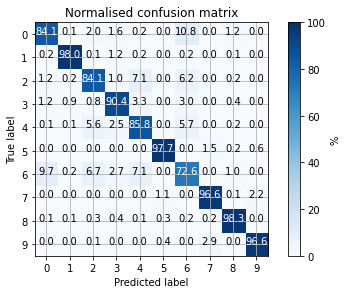

In [ ]:
from sklearn.metrics import classification_report

output_predict_class_onehot = model.predict(input_test)
output_predict_class = np.argmax(output_predict_class_onehot, axis=1)

print('* Test set classification report *')
print()
print(classification_report(output_test_class, output_predict_class,  \
                            target_names=output_class_names))

print('* Confusion probability matrix *')
print()

import itertools

from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(output_test_class, output_predict_class)  # confusion matrix

confusion_probability_matrix = confusion_matrix.astype('float') / \
                               confusion_matrix.sum(axis=1)[:, np.newaxis]  # row normalisation of confusion matrix
confusion_probability_matrix = confusion_probability_matrix * 100.0  # confusion probability matrix

plt.imshow(confusion_probability_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalised confusion matrix')    
plt.colorbar(label='%')
plt.clim(0, 100)
tick_marks = np.arange(len(output_class_names))
plt.xticks(tick_marks, output_class_names, rotation=0)
plt.yticks(tick_marks, output_class_names)
fmt = '.1f'
thresh = confusion_probability_matrix.max() / 2.0
for i, j in itertools.product(range(confusion_probability_matrix.shape[0]), range(confusion_probability_matrix.shape[1])):
    plt.text(j, i, format(confusion_probability_matrix[i, j], fmt),
             horizontalalignment='center',
             color='white' if confusion_probability_matrix[i, j] > thresh else 'black')    
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(None)
plt.show()
plt.close()